# Práctica: análisis de opinión en críticas hoteleras

<img src="img/bellagio.jpg" style="width:200x;height:150;">

Vamos a poner en práctica todo lo aprendido hasta el momento sobre un problema de análisis de críticas a hoteles. El conjunto de datos que utilizaremos es una extracción de Booking.com, disponible en formato original en [Kaggle](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe).

## Instrucciones

A lo largo de este cuaderno encontrarás celdas vacías que tendrás que rellenar con tu propio código. Sigue las instrucciones del cuaderno y presta especial atención a los siguientes iconos:

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Deberás responder a la pregunta indicada con el código o contestación que escribas en la celda inferior. Se te evaluará la práctica según la corrección de tu solución, así como por la calidad del código.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Esto es una pista u observación que te puede ayudar a resolver la práctica. No tienes que escribir en el cuaderno ninguna contestación a estos apartados, pero conviene que los hagas para entender los siguientes pasos.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">Este es un ejercicio avanzado y voluntario que puedes realizar si quieres profundar más sobre el tema. No se considerará para la evaluación de la práctica, pero te animamos a intentarlo para aprender más ¡Ánimo!</td></tr>
</table>

Adicionalmente si necesitas consultar la ayuda de cualquier función python puedes colocar el cursor de escritura sobre el nombre de la misma y pulsar Mayúsculas+Shift para que aparezca un recuadro con sus detalles. Ten en cuenta que esto únicamente funciona en las celdas de código.

¡Adelante!

## Carga de datos

Para empezar vamos a cargar los datos de entrenamiento y test en memoria.

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Carga los datos de <b>data/train.csv</b> y <b>data/test.csv</b> en DataFrames de Pandas con nombres <b>train</b> y <b>test</b>, respectivamente.</td></tr>
</table>

In [1]:
# imports necesarios para la práctica
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
np.random.seed(12345)

from collections import Counter

from wordcloud import WordCloud

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import spacy
from spacy import displacy

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding, Activation

Using TensorFlow backend.


In [2]:
# cargamos los datos de train
df_train = pd.read_csv("./data/train.csv", header=0, sep=",", names=["negative", "positive", "approves"])

df_train.head(5)

,negative,positive,approves
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,False
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,False
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,True
3,Nothing all great,Rooms were stunningly decorated and really sp...,True
4,No Negative,This hotel is being renovated with great care...,True


In [3]:
# varias maneras de convertir los valores de la columna approves a númericos 0 o 1, usamos uno de ellos
df_train["approves"] = df_train["approves"].apply(lambda x: 1 if x == True else 0)

df_train.head(5)

,negative,positive,approves
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,0
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,0
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,1
3,Nothing all great,Rooms were stunningly decorated and really sp...,1
4,No Negative,This hotel is being renovated with great care...,1


In [4]:
# vemos el número de registros y de columnas del dataframe
print("num_rows: %d\tColumnas: %d\n" % (df_train.shape[0], df_train.shape[1]) )
print("Columnas:\n", list(df_train.columns))

num_rows: 10000	Columnas: 3

Columnas:
 ['negative', 'positive', 'approves']


In [5]:
# cargamos los datos de test
df_test = pd.read_csv("./data/test.csv", header=0, sep=",", names=["negative", "positive", "approves"])

df_test.head(5)

,negative,positive,approves
0,No Negative,Breakfast was excellent Reception was very he...,True
1,Nothing,Big breakfast very big and comfortable room,True
2,No Negative,Superb as always,True
3,Would have like to stay longer will stay here...,Great brekkie catered for all 3 of us and gre...,True
4,No Negative,Everything,True


In [6]:
df_test["approves"] = df_test["approves"].apply(lambda x: 1 if x == True else 0)

df_test.head(5)

,negative,positive,approves
0,No Negative,Breakfast was excellent Reception was very he...,1
1,Nothing,Big breakfast very big and comfortable room,1
2,No Negative,Superb as always,1
3,Would have like to stay longer will stay here...,Great brekkie catered for all 3 of us and gre...,1
4,No Negative,Everything,1


In [7]:
# vemos el número de registros y de columnas del dataframe de test
print("num_rows: %d\tColumnas: %d\n" % (df_test.shape[0], df_test.shape[1]) )
print("Columnas:\n", list(df_test.columns))

num_rows: 10000	Columnas: 3

Columnas:
 ['negative', 'positive', 'approves']


In [8]:
# vemos si hay registros vacíos o desconocidos
df_train.isnull().sum()

negative    0
positive    0
approves    0
dtype: int64

In [9]:
df_test.isnull().sum()

negative    0
positive    0
approves    0
dtype: int64

In [10]:
# vemos el recuento de approves False o True tanto en train como en test
langcounter_train = Counter(df_train["approves"])
langcounter_test = Counter(df_test["approves"])

print("Recuento datos train: " , langcounter_train, "\nRecuento datos test: ", langcounter_test)

Recuento datos train:  Counter({1: 9617, 0: 383}) 
Recuento datos test:  Counter({1: 9736, 0: 264})


<table>
<tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">En <b>data/train.csv</b> solo se incluye una porción del conjunto de entrenamiento. Si quieres tratar de conseguir mayores niveles de acierto, puedes emplear el conjunto de entrenamiento completo disponible en <b>data/trainfull.csv</b>.</td></tr>
</table>

In [12]:
# cargamos los datos del dataset mayor
df_trainfull = pd.read_csv("./data/trainfull.csv", header=0, sep=",", names=["negative", "positive", "approves"])

df_trainfull.head(5)

,negative,positive,approves
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,False
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,False
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,True
3,Nothing all great,Rooms were stunningly decorated and really sp...,True
4,No Negative,This hotel is being renovated with great care...,True


In [13]:
# vemos el número de registros y de columnas del dataframe de test
print("num_rows: %d\tColumnas: %d\n" % (df_trainfull.shape[0], df_trainfull.shape[1]) )
print("Columnas:\n", list(df_trainfull.columns))

num_rows: 336458	Columnas: 3

Columnas:
 ['negative', 'positive', 'approves']


In [14]:
# otra forma de convertir los valores de la columna approves a valores 0 y 1
labelencoder = LabelEncoder().fit(df_trainfull["approves"])
df_trainfull["approves"] = labelencoder.transform(df_trainfull["approves"])

df_trainfull.head(10)

,negative,positive,approves
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,0
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,0
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,1
3,Nothing all great,Rooms were stunningly decorated and really sp...,1
4,No Negative,This hotel is being renovated with great care...,1
5,The staff in the restaurant could of been mor...,It was very good very historic building that ...,1
6,No Negative,This hotel is awesome I took it sincirely bec...,1
7,Our room was an overrated disaster room 231 d...,The breakfast was the only positive element o...,0
8,Transportation was a bit of a pain but on rou...,Bed was extremely comfy and the staff where w...,1
9,Nothing,Lovely hotel with extremely comfortable huge ...,1


In [15]:
df_trainfull.isnull().sum()

negative    0
positive    0
approves    0
dtype: int64

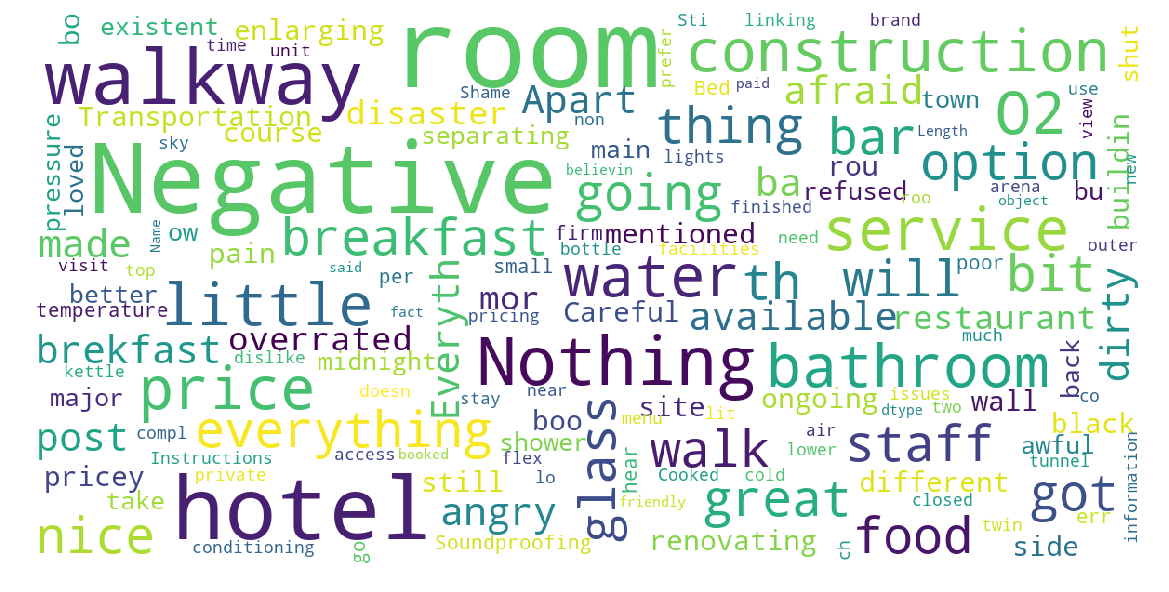

In [16]:
# Una forma de dar un vistazo a los daots, es usar wordcloud y pintar una nube de palabras en relación a su 
# importancia en los datos.
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    

# pintamos el wordcloud en las opiniones negativas de train
show_wordcloud(df_train["negative"])

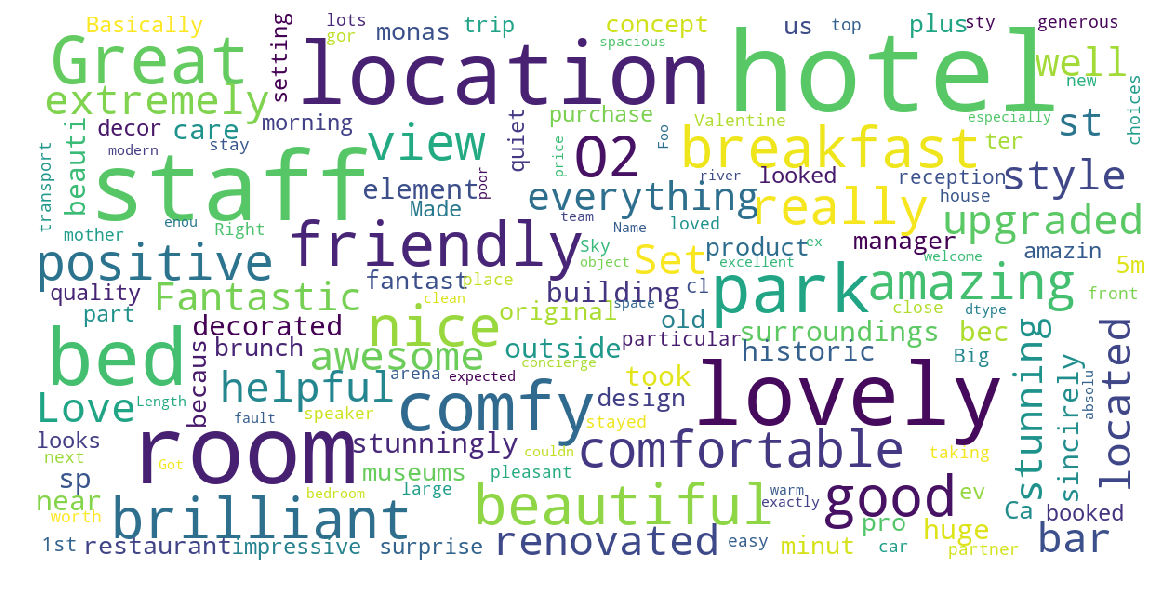

In [17]:
# pintamos el wordcloud en las opiniones positivas de train
show_wordcloud(df_train["positive"])

## Aplica lo aprendido

El objetivo de la práctica es utilizar los datos de entrenamiento para construir un clasificador automático que indique si una crítica de un hotel es favorable o desfavorable. Puedes utilizar cualquiera de las técnicas vistas durante el curso para este fin, aunque a continuación se piden una serie mínima de estrategias a emplear. Para medir la calidad del modelo de clasificación, puedes utilizar el conjunto de datos de test, pero es importante remarcar que estos datos **solo pueden utilizarse para medir el acierto del clasificador**. Esto implica que tampoco pueden emplearse los datos de test para realizar técnicas de validación cruzada o entrenar vectorizadores de textos.

Este problema es desbalanceado, ya que existen muchos más datos de críticas positivas que de críticas negativas. Por ello, usar la precisión o accuracy como métrica de la calidad del modelo **no es aconsejable**, ya que un modelo que clasifique todas críticas como positivas obtendrá una precisión muy alta, a pesar de su falta de utilidad en práctica. En su lugar deberá emplearse la métrica [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), que tiene en cuenta la importancia de ambas clases.

### Modelo basado en caracteres

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando únicamente características basadas en los caracteres del texto. Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Ten en cuenta que cada crítica de hotel incluye dos campos de texto, <i>Negative_Review</i> y <i>Positive_Review</i>. Es recomendable que construyas un modelo que analice ambos textos para tomar la decisión. Puedes construir un Pipeline que tenga en cuenta ambas entradas de datos usando <a href=https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html>ColumnTransformer</a></td></tr>
</table>

In [18]:
# Usamos el objeto CountVectorizer para analizar unigramas de caracteres, y luego el vectorizador para convertir los 
# textos del conjunto de train guardando el resultado en una variable que será la matriz para entrenar el 
# clasificador. Primero probamos con los datos de reviews negativos.
vectorizador = CountVectorizer(analyzer = "char", ngram_range = (1,1))
X_neg = vectorizador.fit_transform(df_train.negative)

# podemos mostrar el contenido de un elemento de train, y ver la representación vectorial generada para ese elemento
print(df_train.negative[10]) ## frase
print(X_neg[10])   ## (numero de frase, id de ngrama) numero de ocurrencias en la frase
vectorizador.vocabulary_ ## ngramas (caracteres) e id de ngrama asignado

 The bathroom in our room was a black glass box It theory it s cool in practice it leaves a lot to be desired Little privacy not enough light at the mirror and the shower leaked into the hall It did however allow for a loft space with a desk chairs and a second tv 
  (0, 34)	1
  (0, 13)	8
  (0, 16)	2
  (0, 21)	3
  (0, 33)	5
  (0, 31)	2
  (0, 12)	4
  (0, 22)	14
  (0, 32)	4
  (0, 26)	3
  (0, 15)	21
  (0, 14)	9
  (0, 18)	13
  (0, 30)	22
  (0, 35)	2
  (0, 28)	14
  (0, 17)	3
  (0, 24)	8
  (0, 25)	21
  (0, 29)	11
  (0, 23)	3
  (0, 11)	20
  (0, 19)	16
  (0, 0)	56


{' ': 0,
 'i': 19,
 'a': 11,
 'm': 23,
 's': 29,
 'o': 25,
 'n': 24,
 'g': 17,
 'r': 28,
 'y': 35,
 't': 30,
 'h': 18,
 'd': 14,
 'e': 15,
 'p': 26,
 'v': 32,
 'l': 22,
 'b': 12,
 'u': 31,
 'w': 33,
 'k': 21,
 'f': 16,
 'c': 13,
 '6': 7,
 '1': 2,
 '7': 8,
 'j': 20,
 '2': 3,
 'x': 34,
 '3': 4,
 '0': 1,
 'q': 27,
 '4': 5,
 'z': 36,
 '8': 9,
 '5': 6,
 '9': 10}

In [19]:
# Ahora tenemos los datos en formato vectorial, así que construimos un modelo con ellos. Usamos en este primer 
# ejemplo LinearSVC.
model_neg = LinearSVC()
model_neg.fit(X_neg, df_train['approves'])

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
# mostramos el score del modelo
print(model_neg.score(X_neg, df_train['approves']))

0.9621


In [21]:
# mostramos el score para los datos de test, para ello debemos pasarlos antes a forma vectorial igual que train
X_test = vectorizador.transform(df_test['negative'])

print(model_neg.score(X_test, df_test['approves']))

0.9737


In [22]:
# uso de la metrica roc_auc_score como se indica para obtener un medidor más fiable
y_predict = model_neg.predict(X_test)

roc_auc_neg = roc_auc_score(df_test['approves'], y_predict)

roc_auc_neg

0.5037365229949454

Podríamos seguir los mismos pasos para trabajar con la columna de textos positivos, pero existe una forma más eficaz de realizar todo el proceso de transformar datos de entrenamiento, construir el modelo, transformar los datos de test y medir la precisión de nuestro modelo sobre ellos. Esa forma es usar un Pipeline de scikit-learn.

Un Pipeline nos permite encadenar varios procesos de modelado, de forma que se ejecuten de forma coordinada.

Además utilizando ColumnTransformer podemos entrenar el modelo con las dos columnas, tanto de textos positivos como de negativos.

In [23]:
# definimos columnTransformer y el pipeline
transformer_char = ColumnTransformer([
    ("negative", CountVectorizer(analyzer = "char", ngram_range = (1,1)),1),
    ("positive", CountVectorizer(analyzer = "char", ngram_range = (1,1)),1)])

model_caracteres = Pipeline([
    ('vectorizer', transformer_char),
    ('classifier', LinearSVC())]
)

# entrenamos el modelo de caracteres con las dos columnas tanto de textos positivos como negativos
model_caracteres.fit(df_train[['negative', 'positive']].values, df_train[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
# vemos los scores
print(model_caracteres.score(df_train[['negative', 'positive']].values, df_train[['approves']]))
print(model_caracteres.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.9617
0.9733


In [25]:
# vemos los valores de la métrica roc_auc_score para los datos de test
y_predict = model_caracteres.predict(df_test[['negative','positive']])

roc_auc_char = roc_auc_score(df_test['approves'], y_predict)

roc_auc_char

0.4998459326211997

In [26]:
# Vamos a probar ahora con SGDClassifier
model_caracteres_sgdc = Pipeline([
    ('vectorizer', transformer_char),
    ('classifier', SGDClassifier())]
)

# entrenamos el modelo de caracteres con las dos columnas tanto de textos positivos como negativos
model_caracteres_sgdc.fit(df_train[['negative', 'positive']].values, df_train[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# vemos los scores
print(model_caracteres_sgdc.score(df_train[['negative', 'positive']].values, df_train[['approves']]))
print(model_caracteres_sgdc.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.9608
0.9652


In [28]:
# vemos los valores de la métrica roc_auc_score para los datos de test
y_predict = model_caracteres_sgdc.predict(df_test[['negative','positive']])

roc_auc_char = roc_auc_score(df_test['approves'], y_predict)

roc_auc_char

0.60071337865093

Ahora vamos a probar el modelo con los datos completos de train.

In [29]:
model_caracteres_full = Pipeline([
    ('vectorizer', transformer_char),
    ('classifier', LinearSVC())]
)

In [30]:
model_caracteres_full.fit(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
print(model_caracteres_full.score(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]))
print(model_caracteres_full.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.9686439317834619
0.9736


In [32]:
y_predict_full = model_caracteres_full.predict(df_test[['negative','positive']])

roc_auc_char_full = roc_auc_score(df_test['approves'], y_predict_full)

roc_auc_char_full

0.5

In [34]:
# probamos los datos completos con SGDClassifier
model_caracteres_full_sgdc = Pipeline([
    ('vectorizer', transformer_char),
    ('classifier', SGDClassifier())]
)

model_caracteres_full_sgdc.fit(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print(model_caracteres_full_sgdc.score(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]))
print(model_caracteres_full_sgdc.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.9718984241718134
0.9761


In [36]:
y_predict_full_sgdc = model_caracteres_full_sgdc.predict(df_test[['negative','positive']])

roc_auc_char_full_sgdc = roc_auc_score(df_test['approves'], y_predict_full_sgdc)

roc_auc_char_full_sgdc

0.5731446552625682

### Modelo basado en tokens (palabras)

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando únicamente características basadas en los tokens del texto. Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

In [37]:
# definimos columnTransformer y el pipeline para trabajar ahora con palabras
transformer_palabras = ColumnTransformer([
    ("negative", CountVectorizer(analyzer = "word", ngram_range = (1,1)),1),
    ("positive", CountVectorizer(analyzer = "word", ngram_range = (1,1)),1)])

model_palabras = Pipeline([
    ('vectorizer', transformer_palabras),
    ('classifier', LinearSVC())]
)

# entrenamos el modelo de palabras con las dos columnas tanto de textos positivos como negativos
model_palabras.fit(df_train[['negative', 'positive']].values, df_train[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# vemos los scores
print(model_palabras.score(df_train[['negative', 'positive']].values, df_train[['approves']]))
print(model_palabras.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.9827
0.9684


In [39]:
# vemos los valores de la métrica roc_auc_score para los datos de test
y_pred_palabras = model_palabras.predict(df_test[['negative','positive']])

roc_auc_word = roc_auc_score(df_test['approves'], y_pred_palabras)

roc_auc_word

0.6447361868479371

In [40]:
model_palabras_full = Pipeline([
    ('vectorizer', transformer_palabras),
    ('classifier', LinearSVC())]
)

model_palabras_full.fit(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
print(model_palabras_full.score(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]))
print(model_palabras_full.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.9798399800272248
0.9786


In [42]:
y_pred_palabras_full = model_palabras_full.predict(df_test[['negative','positive']])

roc_auc_word_full = roc_auc_score(df_test['approves'], y_pred_palabras_full)

roc_auc_word_full

0.657344812131172

Vamos a ver si usando validación cruzada podemos estudiar los mejores parámetros para obtener mejores resultados.

In [43]:
# Declaración del Pipeline
model_params = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
    ]
)

# Declaración de los parámetros a optimizar automáticamente, y los valores que se probarán para cada uno
params = {
    'classifier__C': [0.1, 1, 10],
    'vectorizer__binary' : [False, True],
    'vectorizer__analyzer' : ['char', 'word', 'char_wb'],
    'vectorizer__ngram_range' : [(1,1), (1,2), (1,3), (2,2), (2,3), (3,3)]
}

# Declaración de la estrategia de validación cruzada
search = GridSearchCV(model_params, params, n_jobs=2)

# Ejecución de todo el proceso de entrenamiento, incluída la búsqueda de parámetros
search.fit(df_train["positive"].values, df_train["approves"])

search.best_params_

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'classifier__C': 0.1,
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__ngram_range': (1, 2)}

In [44]:
# definimos columnTransformer y el pipeline para trabajar ahora con palabras
transformer_palabras_best = ColumnTransformer([
    ("negative", CountVectorizer(analyzer = "word", ngram_range = (1,2)),1),
    ("positive", CountVectorizer(analyzer = "word", ngram_range = (1,2)),1)])

model_palabras_best = Pipeline([
    ('vectorizer', transformer_palabras_best),
    ('classifier', LinearSVC())]
)

# entrenamos el modelo de palabras con las dos columnas tanto de textos positivos como negativos
model_palabras_best.fit(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [45]:
print(model_palabras_best.score(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]))
print(model_palabras_best.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.9853176325128248
0.9779


In [46]:
y_pred_palabras_best = model_palabras_best.predict(df_test[['negative','positive']])

roc_auc_word_best = roc_auc_score(df_test['approves'], y_pred_palabras_best)

roc_auc_word_best

0.6735685739896915

In [47]:
# probamos ahora con SGDClassifier
model_palabras_best_sgdc = Pipeline([
    ('vectorizer', transformer_palabras_best),
    ('classifier', SGDClassifier())]
)

# entrenamos el modelo de palabras con las dos columnas tanto de textos positivos como negativos
model_palabras_best_sgdc.fit(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print(model_palabras_best_sgdc.score(df_trainfull[['negative', 'positive']].values, df_trainfull[['approves']]))
print(model_palabras_best_sgdc.score(df_test[['negative', 'positive']].values, df_test[['approves']]))

0.978517378097712
0.9794


In [49]:
y_pred_palabras_best_sgdc = model_palabras_best_sgdc.predict(df_test[['negative','positive']])

roc_auc_word_best_sgdc = roc_auc_score(df_test['approves'], y_pred_palabras_best_sgdc)

roc_auc_word_best_sgdc

0.641172406065586

### Modelo basado en análisis morfosintáctico

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando algún tipo de análisis morfosintáctico (como n-gramas de lemas, o filtros por POS o stopwords). Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Recuerda que es posible acelerar el análisis morfosintáctico desactivando ciertas componentes del modelo nlp de spaCy. Revisa el notebook del ejercicio correspondiente para recordar cómo.</td></tr>
</table>

In [50]:
# instalamos el modelo de spaCy para el idioma inglés
!python -m spacy download en

# Una vez obtenido el modelo podemos cargarlo en memoria
nlp = spacy.load('en')

    100% |████████████████████████████████| 11.1MB 2.6MB/s ta 0:00:011   36% |███████████▊                    | 4.1MB 15.4MB/s eta 0:00:01
  Running setup.py install for en-core-web-sm ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [51]:
# desactivamos ciertos componentes del modelo nlp de Spacy como se recomienda
nlp_disable = spacy.load('en', disable=['ner', 'parser'])

In [60]:
# copiamos el dataframe train, y añadimos dos columnas para almacenar el análisis a traves del modelo nlp tanto
# de los textos de opiniones negativas como de opiniones positivas
df_train_nlp = df_train.copy()
df_train_nlp['nlp_negative'] = np.nan
df_train_nlp['nlp_positive'] = np.nan

In [63]:
# recorremos las opiniones negativas y vamos analizando el texto con nlp y guardando el resultado en la columna creada
for i in range (0, df_train_nlp.shape[0]):
    df_train_nlp.nlp_negative[i] = nlp_disable(df_train_nlp.negative[i])

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
# analisis nlp para los textos positivos y guardarlo en la columna creada en el dataframe para ello
for i in range (0, df_train_nlp.shape[0]):
    df_train_nlp.nlp_positive[i] = nlp_disable(df_train_nlp.positive[i])

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
# visualizamos las columnas creadas tras pasar por nlp
df_train_nlp.head(5)

,negative,positive,approves,nlp_negative,nlp_positive
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,0,"( , I, am, so, angry, that, i, made, this, pos...","( , Only, the, park, outside, of, the, hotel, ..."
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,0,"( , My, room, was, dirty, and, I, was, afraid,...","( , Great, location, in, nice, surroundings, t..."
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,1,"( , Apart, from, the, price, for, the, brekfas...","( , Good, location, Set, in, a, lovely, park, ..."
3,Nothing all great,Rooms were stunningly decorated and really sp...,1,"( , Nothing, all, great)","( , Rooms, were, stunningly, decorated, and, r..."
4,No Negative,This hotel is being renovated with great care...,1,"(No, Negative)","( , This, hotel, is, being, renovated, with, g..."


In [82]:
# ahora generamos otro dataframe a partir del anterior y creamos otras dos columnas, donde vamos a quedarnos con los
# lemas de los tokens que la etiqueta POS sea de ciertas clases. Lo haremos tanto para nlp negativos como positivos.
df_train_nlp_2 = df_train_nlp.copy()
df_train_nlp_2['lemma_negative'] = ""
df_train_nlp_2['lemma_positive'] = ""

In [87]:
# recorremos el dataframe y almacenamos en las nuevas columnas los lemas correspondientes al analisis realizado
# tanto a los textos negativos como a los positivos.
# creamos una función que englobe esta funcionalidad y eficientar los tiempos de ejecución.
def lemmas(texto):
    texto_vacio = ""
    for token in texto:
        if (token.pos_ == "NOUN") or (token.pos_ == "VERB") or (token.pos_ == "ADJ") or (token.pos_ == "ADV"):
            texto_vacio += token.lemma_ + " "
    return texto_vacio

df_train_nlp_2["lemma_negative"] = df_train_nlp_2["nlp_negative"].apply(lambda x: lemmas(x))
df_train_nlp_2["lemma_positive"] = df_train_nlp_2["nlp_positive"].apply(lambda x: lemmas(x))

In [88]:
# vemos el dataframe con todas las columnas ya rellenas
df_train_nlp_2.head(5)

,negative,positive,approves,nlp_negative,nlp_positive,lemma_negative,lemma_positive
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,0,"( , I, am, so, angry, that, i, made, this, pos...","( , Only, the, park, outside, of, the, hotel, ...",be so angry make post available possible site ...,only park hotel be beautiful
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,0,"( , My, room, was, dirty, and, I, was, afraid,...","( , Great, location, in, nice, surroundings, t...",room be dirty be afraid walk barefoot floor lo...,great location nice surrounding bar restaurant...
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,1,"( , Apart, from, the, price, for, the, brekfas...","( , Good, location, Set, in, a, lovely, park, ...",apart price brekfast very good,good location Set lovely park friendly staff h...
3,Nothing all great,Rooms were stunningly decorated and really sp...,1,"( , Nothing, all, great)","( , Rooms, were, stunningly, decorated, and, r...",Nothing great,room be stunningly decorate really spacious to...
4,No Negative,This hotel is being renovated with great care...,1,"(No, Negative)","( , This, hotel, is, being, renovated, with, g...",negative,hotel be be renovate great care appreciation u...


In [90]:
# hacemos los mismos análisis y transformaciones para los datos de test
df_test_nlp = df_test.copy()
df_test_nlp['nlp_negative'] = np.nan
df_test_nlp['nlp_positive'] = np.nan

for i in range (0, df_test_nlp.shape[0]):
    df_test_nlp.nlp_negative[i] = nlp_disable(df_test_nlp.negative[i])

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [91]:
for i in range (0, df_test_nlp.shape[0]):
    df_test_nlp.nlp_positive[i] = nlp_disable(df_test_nlp.positive[i])

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
df_test_nlp_2 = df_test_nlp.copy()
df_test_nlp_2['lemma_negative'] = ""
df_test_nlp_2['lemma_positive'] = ""

In [93]:
df_test_nlp_2["lemma_negative"] = df_test_nlp_2["nlp_negative"].apply(lambda x: lemmas(x))
df_test_nlp_2["lemma_positive"] = df_test_nlp_2["nlp_positive"].apply(lambda x: lemmas(x))

In [94]:
df_test_nlp_2.head(5)

,negative,positive,approves,nlp_negative,nlp_positive,lemma_negative,lemma_positive
0,No Negative,Breakfast was excellent Reception was very he...,1,"(No, Negative)","( , Breakfast, was, excellent, Reception, was,...",negative,be excellent be very helpful
1,Nothing,Big breakfast very big and comfortable room,1,"( , Nothing)","( , Big, breakfast, very, big, and, comfortabl...",Nothing,big breakfast very big comfortable room
2,No Negative,Superb as always,1,"(No, Negative)","( , Superb, as, always)",negative,always
3,Would have like to stay longer will stay here...,Great brekkie catered for all 3 of us and gre...,1,"( , Would, have, like, to, stay, longer, will,...","( , Great, brekkie, catered, for, all, 3, of, ...",Would have stay longer will stay here next tim...,great brekkie cater great location too good va...
4,No Negative,Everything,1,"(No, Negative)","( , Everything)",negative,Everything


In [95]:
# definimos columnTransformer y el pipeline para el modelo 
transformer_morfologico = ColumnTransformer([
    ("lemma_negative", CountVectorizer(analyzer = "word", ngram_range = (1,1)),1),
    ("lemma_positive", CountVectorizer(analyzer = "word", ngram_range = (1,1)),1)])

model_morfologico = Pipeline([
    ('vectorizer', transformer_morfologico),
    ('classifier', LinearSVC())]
)

# entrenamos el modelo
model_morfologico.fit(df_train_nlp_2[['lemma_negative', 'lemma_positive']].values, df_train_nlp_2[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
# evaluamos resultados del modelo
y_pred_morfologico = model_morfologico.predict(df_test_nlp_2[['lemma_negative','lemma_positive']])

roc_auc_morfologico = roc_auc_score(df_test_nlp_2['approves'], y_pred_morfologico)

roc_auc_morfologico

0.6396706381813202

Probamos el modelo cambiando algún parámetro y el clasificador.

In [114]:
# definimos columnTransformer y el pipeline para el modelo 
transformer_morf = ColumnTransformer([
    ("lemma_negative", CountVectorizer(analyzer = "word", ngram_range = (1,1)),1),
    ("lemma_positive", CountVectorizer(analyzer = "word", ngram_range = (1,1)),1)])

model_morf_sgdc = Pipeline([
    ('vectorizer', transformer_morf),
    ('classifier', SGDClassifier())]
)

# entrenamos el modelo
model_morf_sgdc.fit(df_train_nlp_2[['lemma_negative', 'lemma_positive']].values, df_train_nlp_2[['approves']]);

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
# evaluamos resultados del modelo
y_pred_morf = model_morf_sgdc.predict(df_test_nlp_2[['lemma_negative','lemma_positive']])

roc_auc_morf = roc_auc_score(df_test_nlp_2['approves'], y_pred_morf)

roc_auc_morf

0.6467468439530888

### Modelo basado en Deep Learning

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando una aproximación basada en Embeddings y algún tipo de modelo de mezcla (CNN, LSTM, GRU, ...). Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

In [44]:
# Cargamos los datos y preparamos los datos según necesita el modelo keras. Separamos por textos positivos y textos
# negativos
df_train = pd.read_csv("./data/train.csv", header=0, sep=",", names=["negative", "positive", "approves"])
df_test = pd.read_csv("./data/test.csv", header=0, sep=",", names=["negative", "positive", "approves"])

MAX_WORDS = 5000
tokenizer = Tokenizer(num_words=MAX_WORDS)

X_train_neg = df_train["negative"].values
X_train_pos = df_train["positive"].values
y_train = df_train["approves"]

X_test_neg = df_test["negative"].values
X_test_pos = df_test["positive"].values
y_test = df_test["approves"]

tokenizer.fit_on_texts(X_train_neg)
tokenizer.fit_on_texts(X_train_pos)
X_train_neg = tokenizer.texts_to_matrix(X_train_neg)
X_train_pos = tokenizer.texts_to_matrix(X_train_pos)
X_test_neg = tokenizer.texts_to_matrix(X_test_neg)
X_test_pos = tokenizer.texts_to_matrix(X_test_pos)

In [92]:
# arquitectura y montaje de la red neuronal
modelo_keras = Sequential()

modelo_keras.add(Dense(units=1024, activation='relu', input_dim=X_train_neg.shape[1]))
modelo_keras.add(Dropout(0.1))
modelo_keras.add(Dense(units=64, activation='relu'))
modelo_keras.add(Dropout(0.1))
modelo_keras.add(Dense(units=1, activation='sigmoid'))
modelo_keras.add(Dropout(0.1))
modelo_keras.add(Dense(units=1, input_dim=512))

modelo_keras.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 1024)              5121024   
_________________________________________________________________
dropout_44 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 64)                65600     
_________________________________________________________________
dropout_45 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 65        
_________________________________________________________________
dropout_46 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 2         
Total para

In [93]:
# compilamos el modelo con un optimizador y se entrena el modelo
modelo_keras.compile(optimizer=keras.optimizers.Adam(0.001), \
              loss='binary_crossentropy', metrics=['accuracy'])

history = modelo_keras.fit(X_train_neg, y_train, epochs=30, validation_data=(X_test_neg,y_test), \
                batch_size=100, shuffle=True)

Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 9s 858us/step - loss: 0.8834 - acc: 0.7827 - val_loss: 0.3524 - val_acc: 0.9291
Epoch 2/30
10000/10000 [==============================] - 6s 647us/step - loss: 0.7369 - acc: 0.6552 - val_loss: 0.3221 - val_acc: 0.9100
Epoch 3/30
10000/10000 [==============================] - 6s 646us/step - loss: 0.6931 - acc: 0.5956 - val_loss: 0.3454 - val_acc: 0.7832
Epoch 4/30
10000/10000 [==============================] - 7s 659us/step - loss: 0.6498 - acc: 0.5545 - val_loss: 0.3406 - val_acc: 0.7796
Epoch 5/30
10000/10000 [==============================] - 7s 651us/step - loss: 0.6275 - acc: 0.5325 - val_loss: 0.3430 - val_acc: 0.7055
Epoch 6/30
10000/10000 [==============================] - 6s 643us/step - loss: 0.6239 - acc: 0.5604 - val_loss: 0.3340 - val_acc: 0.8142
Epoch 7/30
10000/10000 [==============================] - 6s 642us/step - loss: 0.5845 - acc: 0.5595 - val_loss: 0.3427 - 

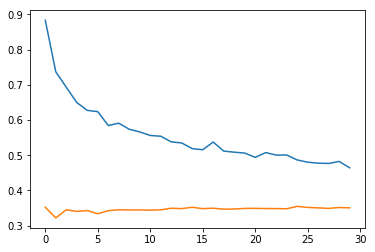

In [94]:
# pintamos gráfica de pérdida
%matplotlib inline

val_loss = history.history['val_loss']
loss = history.history['loss']

epochs = np.arange(len(loss))
up_to_epoch = 500

plt.plot(loss)
plt.plot(val_loss)
plt.show()

In [95]:
# evaluamos resultados del modelo entrenado con textos negativos
y_pred_keras = modelo_keras.predict(X_test_neg)

roc_auc_keras = roc_auc_score(y_test, y_pred_keras)

roc_auc_keras

0.40158304231717334

In [87]:
# arquitectura y montaje de la red neuronal
modelo_keras_pos = Sequential()

modelo_keras_pos.add(Dense(units=1024, activation='relu', input_dim=X_train_pos.shape[1]))
modelo_keras_pos.add(Dropout(0.1))
modelo_keras_pos.add(Dense(units=64, activation='relu'))
modelo_keras_pos.add(Dropout(0.1))
modelo_keras_pos.add(Dense(units=1, activation='sigmoid'))
modelo_keras_pos.add(Dropout(0.1))
modelo_keras_pos.add(Dense(units=1, input_dim=512))

modelo_keras_pos.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 1024)              5121024   
_________________________________________________________________
dropout_41 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_91 (Dense)             (None, 64)                65600     
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 65        
_________________________________________________________________
dropout_43 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 2         
Total para

In [88]:
# compilamos el modelo con un optimizador y se entrena el modelo
modelo_keras_pos.compile(optimizer=keras.optimizers.Adam(0.001), \
              loss='binary_crossentropy', metrics=['accuracy'])

history_pos = modelo_keras_pos.fit(X_train_pos, y_train, epochs=30, validation_data=(X_test_pos,y_test), \
                batch_size=100, shuffle=True)

Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 8s 841us/step - loss: 0.5400 - acc: 0.8639 - val_loss: 0.1699 - val_acc: 0.9771
Epoch 2/30
10000/10000 [==============================] - 6s 623us/step - loss: 0.3841 - acc: 0.8778 - val_loss: 0.1637 - val_acc: 0.9779
Epoch 3/30
10000/10000 [==============================] - 6s 626us/step - loss: 0.3539 - acc: 0.8836 - val_loss: 0.1521 - val_acc: 0.9780
Epoch 4/30
10000/10000 [==============================] - 6s 623us/step - loss: 0.3230 - acc: 0.8868 - val_loss: 0.1413 - val_acc: 0.9766
Epoch 5/30
10000/10000 [==============================] - 6s 635us/step - loss: 0.3193 - acc: 0.8812 - val_loss: 0.1272 - val_acc: 0.9768
Epoch 6/30
10000/10000 [==============================] - 6s 639us/step - loss: 0.2881 - acc: 0.8877 - val_loss: 0.1105 - val_acc: 0.9762
Epoch 7/30
10000/10000 [==============================] - 7s 660us/step - loss: 0.2718 - acc: 0.8862 - val_loss: 0.1013 - 

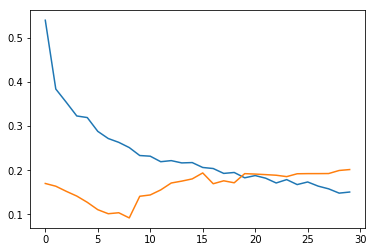

In [89]:
%matplotlib inline

val_loss = history_pos.history['val_loss']
loss = history_pos.history['loss']

epochs = np.arange(len(loss))
up_to_epoch = 500

plt.plot(loss)
plt.plot(val_loss)
plt.show()

In [91]:
# evaluamos resultados del modelo entrenado con los textos positivos
y_pred_pos = modelo_keras_pos.predict(X_test_pos)

roc_auc_pos = roc_auc_score(y_test, y_pred_pos)

roc_auc_pos

0.8905792855631085

## Otras aproximaciones

<table>
<tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">Intenta mezclar varias de las features de puntos anteriores en un único modelo, o probar otras aproximaciones. ¿Puedes conseguir un acierto aún mejor?</td></tr>
</table>

Vamos a utilizar otras opciones como por ejemplo RandomForest y KNeighborsClassifier, y ver que resultado obtenemos.

In [11]:
# sacamos las columnas categóricas, y las pasamos a formato numérico
categorical = list(df_train.select_dtypes(include=['object']).columns.values)

for i in range(0, len(categorical)):
    df_train[categorical[i]] = preprocessing.LabelEncoder().fit_transform(df_train[categorical[i]])
    df_test[categorical[i]] = preprocessing.LabelEncoder().fit_transform(df_test[categorical[i]])

df_train.head()

,negative,positive,approves
0,1364,4525,0
1,2000,2742,0
2,226,2304,1
3,2435,5076,1
4,6089,7568,1


In [12]:
# separamos los datos de train y test en X e y
X_train = df_train[["negative","positive"]]
y_train = df_train["approves"]
X_test = df_test[["negative","positive"]]
y_test = df_test["approves"]

In [13]:
X_train

,negative,positive
0,1364,4525
1,2000,2742
2,226,2304
3,2435,5076
4,6089,7568
5,4688,3446
6,6089,7567
7,2730,6068
8,5044,514
9,2393,4165


In [142]:
# modelo randomForest
modelo_forest = RandomForestClassifier(max_depth=5, random_state=0)
modelo_forest.fit(X_train, y_train)

y_pred_forest = modelo_forest.predict(X_test)

roc_auc_forest = roc_auc_score(y_test, y_pred_forest)

modelo_forest.score(X_test, y_test), roc_auc_forest

/Users/josemanuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9736, 0.5)

In [143]:
# utilizamos clasificador KNeighbors
modelo_knn = KNeighborsClassifier(n_neighbors=10)
modelo_knn.fit(X_train, y_train) 

y_pred_knn = modelo_knn.predict(X_test)

roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

modelo_knn.score(X_test, y_test), roc_auc_knn

(0.9666, 0.5185160977067305)

## Informe

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Escribe un informe explicando qué decisiones has tomado a la hora de diseñar el modelo, qué cosas has probado, qué ha funcionado y qué no.</td></tr>
</table>

#### Carga de los datos:
Cargamos los dos conjuntos, tanto el de training como el de test. En ambos en la columna "approves" donde está el resultado para discernir si la review es positiva o negativa, cambiamos los valores True/False por valores numéricos 1/0 que serán necesarios para luego aplicar los modelos.

Se comprueba que en ambos conjuntos no hay valores faltantes o missing values.

También se ha cargado el dataset de training completo, para usarlo en algunos modelos y ver si entrenando con mayor número de datos se obtienen mejores resultados.

Por último se puede usar Wordcloud y pintar la nube de palabras más relevantes en cada conjunto, por si quiere analizarse este aspecto.


#### Modelo de caracteres:
Como se indica en los consejos de la práctica, se hace uso de ColumnTransformer ya que el modelo que queremos entrenar debe tener en cuenta las dos columnas de textos que tenemos en los conjuntos de datos, tanto los textos positivos como los negativos.
Además usamos pipeline para encadenar varios procesos, que serían el transformer anterior donde se vectorizan las columnas de textos, y el clasificador a utilizar.
Se han usado dos clasificadores, LinearSVC y SGDClassifier. Se han obtenido ligeramente mejores resultados al usar SGDClassifier.

También se ha probado a utilizar los datos completos de training, y se obtienen unos resultados algo mejores que con los datos simples.

Como se indicaba, se ha utilizado para medir el modelo la métrica de roc_auc_score. 

Se ha rozado el 0.60 en la mejor prueba realizada.


#### Modelo de palabras:
Luego se ha usado la misma estructura, sólo que en lugar de pasarle como analyzer caracteres, le decimos que se haga por palabras (words). 
Además aquí hemos utilizado posteriormente validación cruzada para encontrar mejores parámetros para obtener mejores resultados.

Finalmente trás cambiar algún parámetro y hacer distintas pruebas se ha conseguido llegar alrededor del 0.67 mejorando los resultados obtenidos en el análisis basado en caracteres.


#### Modelo morfológico:
Utilizamos spacy, bajando lo necesario para tratamiento de textos en inglés, y además deshabilitamos un par de opciones del modelo nlp para que bajen los tiempos de ejecución.

Hacemos el mismo tratamiento tanto a los datos de train como de test: añadimos al dataframe 4 columnas, dos para guardar los textos negativos y positivos divididos por tokens, y otras dos que en base a las anteriores se queda sólo con los tokens del texto que son nombres, verbos, adjetivos o adverbios.

Una vez tenemos estas columnas rellenas ya generamos el modelo basándonos en el anterior por palabras.


#### Modelo deep learning:
Usamos Keras para montar red neuronal, y utilizar capas dense. Usamos dropout para evitar sobre-entrenamiento. Hacemos una prueba con un modelo entrenado con textos negativos y otro con textos positivos.
Se obtienen bastante mejores resultados con los textos positivos, al evaluar luego con los datos de test y sacar la métrica auc.

Por último hacemos una prueba utilizando RandomForest y también el clasificador KNeighbors.
